# Value Iteration Algorithm

In [1]:
#Loading Packages
import gym
import torch

#Creating the Enviroment
env=gym.make('FrozenLake-v0')

# Value Iteration MDP

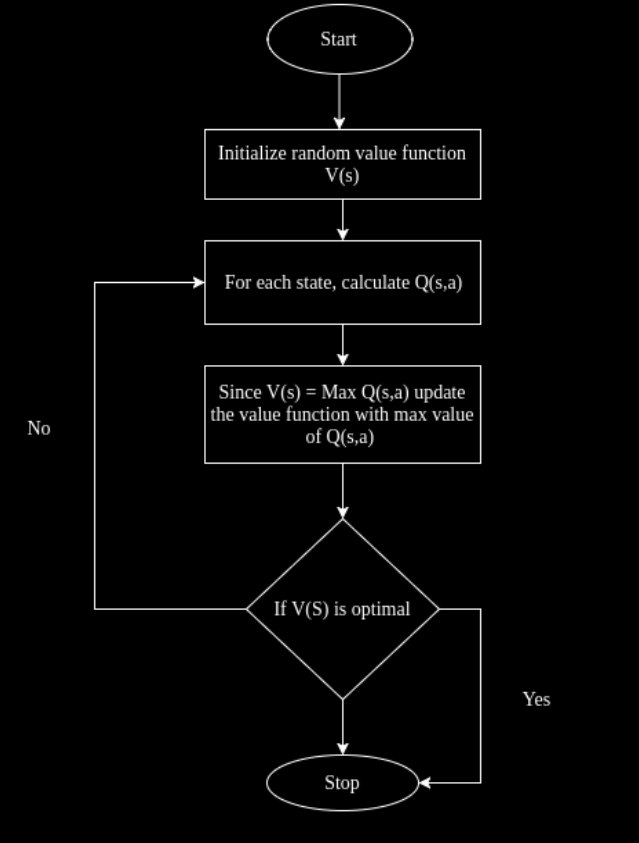

In [2]:
# Inserto las constantes, recordado que gamma tiene que estar entre 0-1 por que si no no converge

gamma=0.99
threshold=0.0001


In [3]:
#Explanation step by step

def value_iteration(env, gamma, threshold):
    #0.Understand the dimensions of the problem, number of posible actions(0-up,1-down,2-left,3-right) and states (16 positions in the map)
    action_space=env.action_space.n
    number_states=env.observation_space.n
    #1.Initialize Random Value Function V(S)=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    V=torch.zeros(number_states)
    #2.Initialize the Loop that Updates the Value Function
    while True:
    #3.Create the Object that gets updated everytime there is a loop V_temp[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]    
        V_temp=torch.empty(number_states)
    #4.Create an empty Object to Copy the Optimal Policy for each state (Maps states to actions , what to do at very state)
        Optimal_policy=torch.empty(number_states)
    #5.Calculate the 'Return' for all posible action in every single state Q(0,0);Q(0,1);Q(0,2);Q(0,3)....Q(15,0),Q(15,1)..   
        for state in range(number_states):
    #6.Create Vector of Actions to save them  V_actions=[Q(0,0),Q(0,1),Q(0,2),Q(0,3)]            
            v_actions=torch.zeros(number_states)
            for action in range(action_space):
    #7.Calculates Q(0,0)== Prob(s=0,s'=0,a=0)*(Reward_New_state[s'=0] + gamma* Value_State_new_state[s'=0]) + Prob(s=0,s'=1,a=0)*(Reward_New_state[s'=1] + gamma* Value_State_new_state[s'=1])+ Prob(s=0,s'=4,a=0)*(Reward_New_state[s'=4] + gamma* Value_State_new_state[s'=4])          
                for trans_prob, new_state, reward,_ in env.P[state][action]:
    #8.Resulting at the of the loop is V_actions=[Q(0,0),Q(0,1),Q(0,2),Q(0,3)]          
                        v_actions[action]+=trans_prob*(reward + gamma*V[new_state])
    #9.It selects the max value for lets say s=0 in v_action and puts it in the value function [lets say Q(0,0)] 
    #  so V_temp = (Q(0,0),0,0,0,0,0,0,0,0,0,0,0,0,0) and does that for all states
            V_temp[state]=torch.max(v_actions)
    #10.The position of the large Q ins the v_actions vector is the best action.     
            Optimal_policy[state]=torch.argmax(v_actions)
    #11.When it finishes pasting all the max values for every possible state V_temp=[max(Q(s=0,a)) , max(Q(s=1,a)......max(Q(s=15,a)))]
    #12.Now I want to determine whether the loop will continue or stop. I want to calculate the difference between policies
        max_delta=torch.max(torch.abs(V-V_temp))
    #13. After this I can replace the Value of V with V_temp from this iteration, updating the current value of V
        V=V_temp
    #14. I stop the loop if the difference is very small between the V_temp and the value
        if max_delta<= threshold:
            break
    #15. Being outside of the loop we return optimum V
    return V, Optimal_policy

In [4]:
# Code without Comments
def value_iteration(env, gamma, threshold):
    action_space=env.action_space.n
    number_states=env.observation_space.n
    V=torch.zeros(number_states)
    while True:
        V_temp=torch.empty(number_states)
        Optimal_policy=torch.zeros(number_states)
        for state in range(number_states):
            v_actions=torch.zeros(number_states)
            for action in range(action_space):
                for trans_prob, new_state, reward,_ in env.P[state][action]:
                        v_actions[action]+=trans_prob*(reward + gamma*V[new_state])
            V_temp[state]=torch.max(v_actions)
            Optimal_policy[state]=torch.argmax(v_actions)
        max_delta=torch.max(torch.abs(V-V_temp))
        V=V_temp
        if max_delta<= threshold:
            break
    return V,Optimal_policy


In [5]:
#We run the value_Iteration and extract both Optimal Policy and 
V,Optimal_Policy=value_iteration(env, gamma, threshold)
print('Optimal Value : {} , Optimal Policy : {}'.format(V,Optimal_Policy))

Optimal Value : tensor([0.5404, 0.4966, 0.4681, 0.4541, 0.5569, 0.0000, 0.3572, 0.0000, 0.5905,
        0.6421, 0.6144, 0.0000, 0.0000, 0.7410, 0.8625, 0.0000]) , Optimal Policy : tensor([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])


# Cheking how good the policy is!

In [6]:
# We have to run Episodes so we have to define the run_episode fun

def run_episode(env,policy):
    #1.Reset The environment
    state=env.reset()
    is_done=False
    total_reward=0
    #2.Loop over all the actions given by the policy until the conditions is broken
    while not is_done:
    #3.The loop starts at state=0 and gets update every step    
        action=policy[state].item()
        new_state,reward,is_done,_=env.step(action)
        total_reward+=reward
    #4. The loop is finished when the agents falls into a puitfall     
        if is_done:
            break
    return total_reward
        

In [7]:
# Now testing the Optimal Policy previously Calculates policy

n_episodes=10000
total_rewards=[]


for episodes in range ( n_episodes):
    episode_reward=run_episode(env,Optimal_Policy)
    total_rewards.append(episode_reward)
   